In [1]:
#load the data
from keras.preprocessing.image import load_img,img_to_array

img_path = '1.jpg'
img = load_img(img_path,target_size=(224,224))
img = img_to_array(img)
img.shape

Using TensorFlow backend.


(224, 224, 3)

In [2]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
print(x.shape)

2022-01-21 16:01:44.294562: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 16:01:44.294942: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d6bbae143d832006294945121d1f1fc so we will re-download the data.
58892288/58889256 [==============================] - 15s 0us/step
(1, 224, 224, 3)


In [4]:
# 特征提取
features = model_vgg.predict(x)
print(features.shape)


(1, 7, 7, 512)


In [6]:
# flatten
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


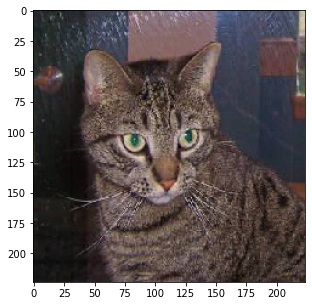

In [10]:
# visualize the data
%matplotlib inline 
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [11]:
#load image and preprocess it with vgg16 structure
#--by flare
from keras.preprocessing.image import img_to_array,load_img
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i
    
folder = "dataset/data_vgg/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i
    
#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

preprocessed: dataset/data_vgg/cats//cat.6.jpg
preprocessed: dataset/data_vgg/cats//cat.239.jpg
preprocessed: dataset/data_vgg/cats//cat.211.jpg
preprocessed: dataset/data_vgg/cats//cat.205.jpg
preprocessed: dataset/data_vgg/cats//cat.198.jpg
preprocessed: dataset/data_vgg/cats//cat.30.jpg
preprocessed: dataset/data_vgg/cats//cat.24.jpg
preprocessed: dataset/data_vgg/cats//cat.167.jpg
preprocessed: dataset/data_vgg/cats//cat.18.jpg
preprocessed: dataset/data_vgg/cats//cat.173.jpg
preprocessed: dataset/data_vgg/cats//cat.172.jpg
preprocessed: dataset/data_vgg/cats//cat.19.jpg
preprocessed: dataset/data_vgg/cats//cat.166.jpg
preprocessed: dataset/data_vgg/cats//cat.25.jpg
preprocessed: dataset/data_vgg/cats//cat.31.jpg
preprocessed: dataset/data_vgg/cats//cat.199.jpg
preprocessed: dataset/data_vgg/cats//cat.204.jpg
preprocessed: dataset/data_vgg/cats//cat.210.jpg
preprocessed: dataset/data_vgg/cats//cat.238.jpg
preprocessed: dataset/data_vgg/cats//cat.7.jpg
preprocessed: dataset/data_vgg

preprocessed: dataset/data_vgg/cats//cat.291.jpg
preprocessed: dataset/data_vgg/cats//cat.287.jpg
preprocessed: dataset/data_vgg/cats//cat.293.jpg
preprocessed: dataset/data_vgg/cats//cat.278.jpg
preprocessed: dataset/data_vgg/cats//cat.244.jpg
preprocessed: dataset/data_vgg/cats//cat.250.jpg
preprocessed: dataset/data_vgg/cats//cat.65.jpg
preprocessed: dataset/data_vgg/cats//cat.71.jpg
preprocessed: dataset/data_vgg/cats//cat.59.jpg
preprocessed: dataset/data_vgg/cats//cat.132.jpg
preprocessed: dataset/data_vgg/cats//cat.126.jpg
preprocessed: dataset/data_vgg/cats//cat.127.jpg
preprocessed: dataset/data_vgg/cats//cat.133.jpg
preprocessed: dataset/data_vgg/cats//cat.58.jpg
preprocessed: dataset/data_vgg/cats//cat.70.jpg
preprocessed: dataset/data_vgg/cats//cat.64.jpg
preprocessed: dataset/data_vgg/cats//cat.251.jpg
preprocessed: dataset/data_vgg/cats//cat.245.jpg
preprocessed: dataset/data_vgg/cats//cat.279.jpg
preprocessed: dataset/data_vgg/cats//cat.292.jpg
preprocessed: dataset/data

preprocessed: dataset/data_vgg/dogs//dog.160.jpg
preprocessed: dataset/data_vgg/dogs//dog.174.jpg
preprocessed: dataset/data_vgg/dogs//dog.19.jpg
preprocessed: dataset/data_vgg/dogs//dog.31.jpg
preprocessed: dataset/data_vgg/dogs//dog.148.jpg
preprocessed: dataset/data_vgg/dogs//dog.25.jpg
preprocessed: dataset/data_vgg/dogs//dog.216.jpg
preprocessed: dataset/data_vgg/dogs//dog.202.jpg
preprocessed: dataset/data_vgg/dogs//dog.228.jpg
preprocessed: dataset/data_vgg/dogs//dog.214.jpg
preprocessed: dataset/data_vgg/dogs//dog.200.jpg
preprocessed: dataset/data_vgg/dogs//dog.33.jpg
preprocessed: dataset/data_vgg/dogs//dog.27.jpg
preprocessed: dataset/data_vgg/dogs//dog.162.jpg
preprocessed: dataset/data_vgg/dogs//dog.176.jpg
preprocessed: dataset/data_vgg/dogs//dog.189.jpg
preprocessed: dataset/data_vgg/dogs//dog.188.jpg
preprocessed: dataset/data_vgg/dogs//dog.177.jpg
preprocessed: dataset/data_vgg/dogs//dog.163.jpg
preprocessed: dataset/data_vgg/dogs//dog.26.jpg
preprocessed: dataset/data

preprocessed: dataset/data_vgg/dogs//dog.297.jpg
preprocessed: dataset/data_vgg/dogs//dog.283.jpg
preprocessed: dataset/data_vgg/dogs//dog.254.jpg
preprocessed: dataset/data_vgg/dogs//dog.240.jpg
preprocessed: dataset/data_vgg/dogs//dog.268.jpg
preprocessed: dataset/data_vgg/dogs//dog.256.jpg
preprocessed: dataset/data_vgg/dogs//dog.242.jpg
preprocessed: dataset/data_vgg/dogs//dog.295.jpg
preprocessed: dataset/data_vgg/dogs//dog.281.jpg
preprocessed: dataset/data_vgg/dogs//dog.71.jpg
preprocessed: dataset/data_vgg/dogs//dog.108.jpg
preprocessed: dataset/data_vgg/dogs//dog.65.jpg
preprocessed: dataset/data_vgg/dogs//dog.120.jpg
preprocessed: dataset/data_vgg/dogs//dog.134.jpg
preprocessed: dataset/data_vgg/dogs//dog.59.jpg
preprocessed: dataset/data_vgg/dogs//dog.135.jpg
preprocessed: dataset/data_vgg/dogs//dog.58.jpg
preprocessed: dataset/data_vgg/dogs//dog.121.jpg
preprocessed: dataset/data_vgg/dogs//dog.109.jpg
preprocessed: dataset/data_vgg/dogs//dog.64.jpg
preprocessed: dataset/dat

In [12]:
# split the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape, X_test.shape, X.shape)

(420, 25088) (180, 25088) (600, 25088)


In [13]:
# set up the mlp model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                250890    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
# configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# train the model
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
420/420 [==============================] - 1s 2ms/step - loss: 2.5208 - accuracy: 0.8500
Epoch 2/50
420/420 [==============================] - 0s 225us/step - loss: 0.1407 - accuracy: 0.9595
Epoch 3/50
420/420 [==============================] - 0s 213us/step - loss: 0.1002 - accuracy: 0.9714
Epoch 4/50
420/420 [==============================] - 0s 210us/step - loss: 0.0388 - accuracy: 0.9857
Epoch 5/50
420/420 [==============================] - 0s 215us/step - loss: 0.0196 - accuracy: 0.9857
Epoch 6/50
420/420 [==============================] - 0s 232us/step - loss: 0.0182 - accuracy: 0.9881
Epoch 7/50
420/420 [==============================] - 0s 223us/step - loss: 0.0182 - accuracy: 0.9881
Epoch 8/50
420/420 [==============================] - 0s 224us/step - loss: 0.0182 - accuracy: 0.9881
Epoch 9/50
420/420 [==============================] - 0s 218us/step - loss: 0.0182 - accuracy: 0.9881
Epoch 10/50
420/420 [==============================] - 0s 218us/step - loss: 0.0182 

In [17]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict_classes(X_train)
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

1.0


In [18]:
# 测试准确率
y_test_predict = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.9555555555555556


In [22]:
# 网站图片测试
img_path = 'cat1.jpg'
img =load_img(img_path,target_size=(224,224))
img = img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)
features = model_vgg.predict(x)
features = features.reshape(1,7*7*512)

result = model.predict_classes(features)
print(result)

[[0]]
